# Домашняя работа "Поиск выбросов и генерация новых признаков"

Взять датасет https://www.kaggle.com/c/sberbank-russian-housing-market/overview

- Провести EDA с упором на пропущенные значения
- Обучить простую модель несколько раз (см. ниже) и сравнить качество.
- При обучении модели постепенно заполнять пропуски. При заполнении пропусков обосновывать выбранный тип метода заполнения.
- Сгенерировать не менее новых 5 признаков (генерация с помощью PolynomialFeatures считать как один признак) и обучить модель после каждого добавления нового признака для контроля качества.
- Построить изменения качества график качества модели на каждом шаге (после каждого заполнения пропусков в очередном признаке и после каждого добавления нового признака)

# Решение

In [1]:
import pandas
from matplotlib import pyplot

In [2]:
def get_train_data(columns):
    return pandas.read_csv('train.csv')[columns]

columns = [
    'full_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
    'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
    'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
    'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
    'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
    'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
]
target = 'life_sq'
data = get_train_data(columns=columns + [target])

#### EDA с упором на пропущенные значения

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   full_sq                            30471 non-null  int64  
 1   floor                              30304 non-null  float64
 2   max_floor                          20899 non-null  float64
 3   material                           20899 non-null  float64
 4   build_year                         16866 non-null  float64
 5   num_room                           20899 non-null  float64
 6   kitch_sq                           20899 non-null  float64
 7   state                              16912 non-null  float64
 8   area_m                             30471 non-null  float64
 9   raion_popul                        30471 non-null  int64  
 10  green_zone_part                    30471 non-null  float64
 11  indust_part                        30471 non-null  flo

In [4]:
data.head()

,full_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,...,bulvar_ring_km,kremlin_km,ts_km,big_market_km,market_shop_km,fitness_km,university_km,workplaces_km,shopping_centers_km,life_sq
0,43,4.0,NaN,NaN,NaN,NaN,NaN,NaN,6.407578e+06,155572,...,13.675657,15.156211,4.308127,10.814172,1.676258,0.485841,6.715026,0.884350,0.648488,27.0
1,34,3.0,NaN,NaN,NaN,NaN,NaN,NaN,9.589337e+06,115352,...,8.132640,8.698054,0.725560,6.910568,3.424716,0.668364,1.852560,0.686252,0.519311,19.0
2,43,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.808270e+06,101708,...,8.054252,9.067885,3.562188,5.752368,1.375443,0.733101,0.841254,1.510089,1.486533,29.0
3,89,9.0,NaN,NaN,NaN,NaN,NaN,NaN,1.258354e+07,178473,...,18.309433,19.487005,0.583025,27.892717,0.811275,0.623484,10.903161,0.622272,0.599914,50.0
4,77,4.0,NaN,NaN,NaN,NaN,NaN,NaN,8.398461e+06,108171,...,0.787593,2.578671,2.609420,9.155057,1.969738,0.220288,0.991683,0.892668,0.429052,77.0


- **full_sq:** total area in square meters, including loggias, balconies and other non-residential areas
- **life_sq:** living area in square meters, excluding loggias, balconies and other non-residential areas
- **floor:** for apartments, floor of the building
- **max_floor:** number of floors in the building
- **material:** wall material
- **build_year:** year built
- **num_room:** number of living rooms
- **kitch_sq:** kitchen area
- **state:** apartment condition
- **area_m:** Area mun. area, sq.m.
- **raion_popul:** Number of municipality population. district
- **green_zone_part:** Proportion of area of ​​greenery in the total area
- **indust_part:** Share of industrial zones in area of ​​the total area
- **preschool_education_centers_raion:** Number of pre-school  institutions
- **school_education_centers_raion:** Number of  high school institutions
- **hospital_beds_raion:** Number of hospital beds for the district
- **healthcare_centers_raion:** Number of healthcare centers in district
- **sport_objects_raion:** Number of higher education institutions
- **additional_education_raion:** Number of additional education organizations
- **shopping_centers_raion:** Number of malls and shopping centres in district
- **office_raion:** Number of malls and shopping centres in district
- **metro_min_walk:** Time to metro by foot
- **metro_km_walk:** Distance to the metro, km
- **kindergarten_km:** Distance to kindergarten
- **school_km:** Distance to high school 
- **park_km:** Distance to park
- **incineration_km:** Distance to the incineration
- **water_km:** Distance to the water reservoir / river
- **mkad_km:** Distance to MKAD (Moscow Circle Auto Road)
- **ttk_km:** Distance to the TTC (Third Transport Ring)
- **sadovoe_km:** Distance to the Garden Ring
- **bulvar_ring_km:** The distance to the Boulevard Ring
- **kremlin_km:** Distance to the city center (Kremlin)
- **ts_km:** Distance to power station
- **big_market_km:** Distance to grocery / wholesale markets
- **market_shop_km:** Distance to markets and department stores
- **fitness_km:** Distance to fitness
- **university_km:** Distance to universities
- **workplaces_km:** Distance to workplaces
- **shopping_centers_km:** Distance to shopping centers
- **office_km:** Distance to business centers/ offices
- **additional_education_km:** Distance to additional education
- **preschool_km:** Distance to preschool education organizations
- **price_doc:** sale price (this is the target variable)

#### Вспомогательные функции

In [5]:
from Services import VariablesService

variablesService = VariablesService()

#### Обучить простую модель

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

def get_line_regression_score(data, column_names, target_column_name):
    x_train, x_test, y_train, y_test = split_data(data, column_names, target_column_name)
    
    linearRegression = LinearRegression()
    linearRegression.fit(x_train, y_train)
        
    return linearRegression.score(x_test, y_test)
    
def split_data(data, column_names, target_column_name):
    column_names = list(column_names.copy())
    
    try:
        column_names.remove(target_column_name)
    except:
        pass
    
    x_values = data[column_names]
    y_values = data[[target_column_name]]
    
    return train_test_split(
            x_values, 
            y_values, 
            train_size=0.75, 
            random_state=42)

In [7]:
# колонки с пропущенными значениями      
variablesService.get_columns_with_outlier_values(data=data)

['floor',
 'max_floor',
 'material',
 'build_year',
 'num_room',
 'kitch_sq',
 'state',
 'hospital_beds_raion',
 'metro_min_walk',
 'life_sq']

In [8]:
control_score = get_line_regression_score(
    data=data.fillna(0),
    column_names=columns,
    target_column_name=target)

control_score

0.1466548299380569

#### Заполняем пропуски

Я, преимущественно, заполнял бы пропуски медианами, так как они менее чувствительны к выбросам и наверное пользовался вариантом линейной регрессии. Но так как  колонок много и видимо хотят чтобы я показал что умею заполнять пропуски разными методами (в ДЗ по по выбросам, как это не странно) то далее заполняю разными методами.

In [9]:
data = variablesService.get_filled_averages_dataset(
    dataset=data, 
    target_column='state', 
    mode='median')

state_score = get_line_regression_score(
    data=data.fillna(0),
    column_names=columns,
    target_column_name=target)

state_score

0.14296179085032346

In [10]:
data = variablesService.get_filled_averages_dataset(
    dataset=data, 
    target_column='hospital_beds_raion', 
    mode='median')

state_hospital = get_line_regression_score(
    data=data.fillna(0),
    column_names=columns,
    target_column_name=target)

state_hospital

0.14323261935295928

In [11]:
data = variablesService.get_filled_averages_dataset(
    dataset=data, 
    target_column='max_floor', 
    mode='max')

max_floor_score = get_line_regression_score(
    data=data.fillna(0),
    column_names=columns,
    target_column_name=target)

max_floor_score

0.17409950730931123

In [12]:
data = variablesService.get_filled_averages_dataset(
    dataset=data, 
    target_column='floor', 
    mode='mode')

floor_score = get_line_regression_score(
    data=data.fillna(0),
    column_names=columns,
    target_column_name=target)

floor_score

0.174062638169325

In [13]:
data = variablesService.get_filled_indicator_dataset(
    dataset=data, 
    target_column='material')

material_score = get_line_regression_score(
    data=data.fillna(0),
    column_names=columns,
    target_column_name=target)

material_score

0.174062638169325

In [14]:
data = variablesService.get_filled_linear_regression_dataset(
    dataset=data, 
    target_column='num_room', 
    columns=variablesService.get_columns_with_filled_values(
        data=data))

num_score = get_line_regression_score(
    data=data.fillna(0),
    column_names=columns,
    target_column_name=target)

num_score

0.14339653257439933

In [15]:
data = variablesService.get_filled_linear_regression_dataset(
    dataset=data, 
    target_column='build_year', 
    columns=variablesService.get_columns_with_filled_values(
        data=data))

build_year_score = get_line_regression_score(
    data=data.fillna(0),
    column_names=columns,
    target_column_name=target)

build_year_score

0.14347655323935726

In [16]:
data = variablesService.get_filled_linear_regression_dataset(
    dataset=data, 
    target_column='kitch_sq', 
    columns=variablesService.get_columns_with_filled_values(
        data=data))

kitch_sq_score = get_line_regression_score(
    data=data.fillna(0),
    column_names=columns,
    target_column_name=target)

kitch_sq_score

0.14270863420808755

In [17]:
data = variablesService.get_filled_linear_regression_dataset(
    dataset=data, 
    target_column='metro_min_walk', 
    columns=variablesService.get_columns_with_filled_values(
        data=data))

metro_min_walk_score = get_line_regression_score(
    data=data.fillna(0),
    column_names=columns,
    target_column_name=target)

metro_min_walk_score

0.14270415079663046

In [18]:
data = variablesService.get_filled_linear_regression_dataset(
    dataset=data, 
    target_column='life_sq', 
    columns=variablesService.get_columns_with_filled_values(
        data=data))

life_sq_score = get_line_regression_score(
    data=data.fillna(0),
    column_names=columns,
    target_column_name=target)

life_sq_score

0.26811597132257514

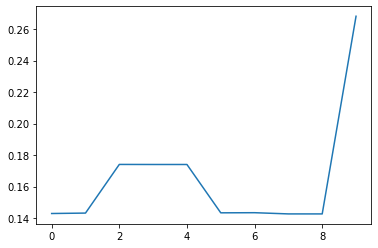

In [19]:
scores = [state_score, state_hospital, max_floor_score,
     floor_score, material_score,
     num_score, build_year_score,
     kitch_sq_score, metro_min_walk_score,
     life_sq_score]

pyplot.plot(
    list(range(len(scores))), 
    scores)
pyplot.show()

#### Сгенерировать не менее новых 5 признаков 

Генерация с помощью PolynomialFeatures считать как один признак и обучить модель после каждого добавления нового признака для контроля качества.

In [20]:
km_column_names = [
    'kindergarten_km', 
    'school_km', 
    'park_km', 
    'green_zone_km', 
    'industrial_km', 
    'water_km', 
    'mkad_km', 
    'ttk_km', 
    'sadovoe_km', 
    'bulvar_ring_km', 
    'kremlin_km', 
    'ts_km', 
    'big_market_km', 
    'market_shop_km', 
    'fitness_km', 
    'university_km', 
    'workplaces_km', 
    'shopping_centers_km'
]
data['total_km'] = data[km_column_names].sum(axis=1)
columns.append('total_km')

total_km_score = get_line_regression_score(
    data=data.fillna(0),
    column_names=columns,
    target_column_name=target)

total_km_score

0.2681159713228395

In [21]:
data['squaer_area_m'] = data['area_m'] * 2
columns.append('squaer_area_m')

squaer_area_m_score = get_line_regression_score(
    data=data.fillna(0),
    column_names=columns,
    target_column_name=target)

squaer_area_m_score

0.26811597133116305

In [22]:
data['floor_max_floor'] = data['floor'] * data['max_floor']
columns.append('floor_max_floor')

floor_max_floor_score = get_line_regression_score(
    data=data.fillna(0),
    column_names=columns,
    target_column_name=target)

floor_max_floor_score

0.268170721981442

In [23]:
data['life_kitch_sq_score'] = data['life_sq'] * data['kitch_sq']
columns.append('life_kitch_sq_score')

life_kitch_sq_score = get_line_regression_score(
    data=data.fillna(0),
    column_names=columns,
    target_column_name=target)

life_kitch_sq_score

0.6406668613791802

In [24]:
from sklearn.preprocessing import PolynomialFeatures
import random

polynomialFeatures = PolynomialFeatures(2)
polynomial_values = polynomialFeatures.fit_transform(data[columns])
polynomial_column_names = polynomialFeatures.get_feature_names(data[columns].columns)
polynomial_column = random.choice(polynomial_column_names)
polynomial_data = pandas.DataFrame(polynomial_values, columns=polynomial_column_names)

while True:
    if polynomial_column in columns:
        polynomial_column = random.choice(polynomial_column_names)
    else:
        columns.append(polynomial_column)
        break
        
data[polynomial_column] = polynomial_data[polynomial_column]

polynomial_score = get_line_regression_score(
    data=data.fillna(0),
    column_names=columns,
    target_column_name=target)

polynomial_score

0.6407583986294687

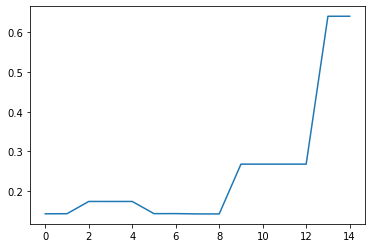

In [25]:
scores = [
    state_score, state_hospital, max_floor_score,
    floor_score, material_score,
    num_score, build_year_score,
    kitch_sq_score, metro_min_walk_score,
    life_sq_score,
    total_km_score, 
    squaer_area_m_score,
    floor_max_floor_score,
    life_kitch_sq_score,
    polynomial_score
]

pyplot.plot(
    list(range(len(scores))), 
    scores)
pyplot.show()